LAG 7

Para que las pruebas sean más rapidas voy a coger una o dos series de cada cluster:


Cluster 0:
['ACCIONA','INDITEX']

Cluster 1:
['INM. COLONIAL']

Cluster 2:
['AENA', 'SANTANDER']

Cluster 3:
['ARCELORMITTAL', 'BBVA']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/IBEX35_cotizaciones_20_Limpio.csv", sep=",")
df

,Fecha,Empresa,Precio_cierre
0,NaN,NaN,NaN
1,2005-04-01,ACCIONA,36.337158
2,2005-04-04,ACCIONA,35.794037
3,2005-04-05,ACCIONA,36.233715
4,2005-04-06,ACCIONA,36.388882
...,...,...,...
151101,2025-03-26,UNICAJA BANCO,1.774000
151102,2025-03-27,UNICAJA BANCO,1.749000
151103,2025-03-28,UNICAJA BANCO,1.710000
151104,2025-03-31,UNICAJA BANCO,1.706000


In [3]:
df_ACCIONA = df[df["Empresa"] == "ACCIONA"]
df_INDITEX = df[df["Empresa"] == "INDITEX"]
df_AENA = df[df["Empresa"] == "AENA"]
df_ARCELORMITTAL = df[df["Empresa"] == "ARCELORMITTAL"]
df_BBVA = df[df["Empresa"] == "BBVA"]
df_INM_COLONIAL = df[df["Empresa"] == "INM. COLONIAL"]
df_SANTANDER = df[df["Empresa"] == "SANTANDER"]



In [4]:
empresas_prueba = [df_ACCIONA, df_INDITEX, df_AENA, df_ARCELORMITTAL, df_BBVA, df_INM_COLONIAL, df_SANTANDER]


In [5]:
# Paso 1: Asegurar formato correcto y limpiar columnas para cada DataFrame de la lista
for i in range(len(empresas_prueba)):
    df = empresas_prueba[i].copy()  # Copia del DataFrame
    df.reset_index(inplace=True)  # Por si 'Fecha' es índice
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    df['Precio_cierre'] = pd.to_numeric(df['Precio_cierre'], errors='coerce')
    df = df[['Fecha', 'Precio_cierre']].set_index('Fecha')
    empresas_prueba[i] = df  # Reasignar el DataFrame procesado

# Paso 2: Añadir columnas de tiempo a cada DataFrame
for df in empresas_prueba:
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['day'] = df.index.day
    df['day_of_week'] = df.index.dayofweek
    df['week_of_year'] = df.index.isocalendar().week

# Paso 3: Crear variables lag con 7 días
for df in empresas_prueba:
    df['Precio_cierre_lag15'] = df['Precio_cierre'].shift(15)
    df['year_lag15'] = df['year'].shift(15)
    df['month_lag15'] = df['month'].shift(15)
    df['quarter_lag15'] = df['quarter'].shift(15)
    df['day_of_week_lag15'] = df['day_of_week'].shift(15)
    df['week_of_year_lag15'] = df['week_of_year'].shift(15)

# Paso 4: Calcular medias y desviaciones móviles con lag 15
for df in empresas_prueba:
    for window in [7, 30, 60]:
        df[f'rolling_mean_{window}_lag15'] = df['Precio_cierre'].shift(15).rolling(window=window).mean()
        df[f'rolling_std_{window}_lag15'] = df['Precio_cierre'].shift(15).rolling(window=window).std()

# Paso 5: Reasignar los DataFrames modificados a sus nombres originales
df_ACCIONA, df_INDITEX, df_AENA, df_ARCELORMITTAL, df_BBVA, df_INM_COLONIAL, df_SANTANDER = empresas_prueba


In [6]:
for df in empresas_prueba:
    df.dropna(inplace=True)


In [7]:
df_AENA

,Precio_cierre,year,month,quarter,day,day_of_week,week_of_year,Precio_cierre_lag15,year_lag15,month_lag15,quarter_lag15,day_of_week_lag15,week_of_year_lag15,rolling_mean_7_lag15,rolling_std_7_lag15,rolling_mean_30_lag15,rolling_std_30_lag15,rolling_mean_60_lag15,rolling_std_60_lag15
Fecha,,,,,,,,,,,,,,,,,,,
2015-05-29,74.451447,2015,5,2,29,4,22,68.286186,2015.0,5.0,2.0,4.0,19,67.077661,1.626290,70.001013,4.183333,65.980844,5.462861
2015-06-01,74.451447,2015,6,2,1,0,23,68.949539,2015.0,5.0,2.0,0.0,20,67.724288,1.251634,70.209123,3.957100,66.219520,5.267840
2015-06-02,73.358871,2015,6,2,2,1,23,69.144638,2015.0,5.0,2.0,1.0,20,68.247164,0.864724,70.415672,3.719623,66.461448,5.055558
2015-06-03,74.349991,2015,6,2,3,2,23,69.581673,2015.0,5.0,2.0,2.0,20,68.318516,0.960422,70.549904,3.609176,66.658633,4.939439
2015-06-04,73.639816,2015,6,2,4,3,23,73.171577,2015.0,5.0,2.0,3.0,20,69.133493,1.987957,70.660723,3.637777,66.935160,4.828827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-26,218.800003,2025,3,1,26,2,13,215.000000,2025.0,3.0,1.0,2.0,10,215.371427,0.875052,212.673334,5.714466,205.955001,7.997000
2025-03-27,219.199997,2025,3,1,27,3,13,212.000000,2025.0,3.0,1.0,3.0,10,214.771428,1.457983,212.953334,5.454434,206.135001,8.009694
2025-03-28,219.800003,2025,3,1,28,4,13,217.399994,2025.0,3.0,1.0,4.0,10,215.085713,1.769583,213.446667,5.146323,206.425001,8.098308


In [8]:
# Definir fecha de corte
fecha_test = '2022-04-01'

# Recorrer cada DataFrame en la lista empresas_prueba
for idx, df in enumerate(empresas_prueba):
    # División en train y test según la fecha de corte
    train = df[df.index < fecha_test].copy()
    test = df[df.index >= fecha_test].copy()

    # Separar features (X) y target (y)
    X_train = train.drop(columns=['Precio_cierre'])
    y_train = train['Precio_cierre']

    X_test = test.drop(columns=['Precio_cierre'])
    y_test = test['Precio_cierre']

    # Mostrar resultados de la división
    print(f"DataFrame {idx+1}:")
    print(f"Train: {train.index.min().date()} → {train.index.max().date()}")
    print(f"Test : {test.index.min().date()} → {test.index.max().date()}")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
    print("-" * 50)


DataFrame 1:
Train: 2005-07-14 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4274, 18), y_train shape: (4274,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 2:
Train: 2005-07-14 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4274, 18), y_train shape: (4274,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 3:
Train: 2015-05-29 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (1753, 18), y_train shape: (1753,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 4:
Train: 2006-11-09 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (3932, 18), y_train shape: (3932,)
X_test shape: (768, 18), y_test shape: (768,)
--------------------------------------------------
DataFrame 5:
Train: 2005-07-14 → 2022-03-31
Test : 2022-04-01 → 2025-04-01
X_train shape: (4274, 18), y_train sh

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}


MISMO MODELO PARA TODAS -> EL DE MENOR RMSE MEDIO

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import numpy as np

# Definir modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500)  # Red neuronal
}

# Hiperparámetros
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001]
    }
}

# Función para evaluar los modelos
def evaluate_models(X_train, y_train, X_test, y_test, models, param_grids):
    model_rmse = {}

    for model_name, model in models.items():
        print(f"\nEntrenando {model_name}...")

        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            scoring='neg_root_mean_squared_error',
            cv=3,
            verbose=1,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_estimator = grid_search.best_estimator_
        best_score = -grid_search.best_score_

        print(f"Mejor RMSE (CV) para {model_name}: {best_score:.4f}")

        y_pred = best_estimator.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE en test para {model_name}: {rmse:.4f}")

        model_rmse[model_name] = rmse

    return model_rmse

# Guardar RMSE medios por modelo
model_rmse_mean = {model_name: [] for model_name in models.keys()}

# Recorrer cada DataFrame en la lista cluster0
for idx, df in enumerate(empresas_prueba):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test,
        models, param_grids
    )

    # Guardar RMSE para cada modelo
    for model_name, rmse in model_rmse.items():
        model_rmse_mean[model_name].append(rmse)

# Calcular RMSE medio para cada modelo
mean_rmse = {model_name: np.mean(rmses) for model_name, rmses in model_rmse_mean.items()}

# Seleccionar el modelo con menor RMSE medio
best_model_name = min(mean_rmse, key=mean_rmse.get)
print(f"\n✅ El mejor modelo es: {best_model_name} con RMSE medio = {mean_rmse[best_model_name]:.4f}")


Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 5.7263
RMSE en test para Linear Regression: 8.9856

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 13.2081
RMSE en test para Decision Tree: 20.9867

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 12.1035
RMSE en test para Random Forest: 21.0995

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 10.5556
RMSE en test para Gradient Boosting: 21.0074

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 10.7630
RMSE en test para XGBoost: 20.8490

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 12.8875
RMSE en test para MLP Regressor: 15.6394

Evaluando modelos para la serie 2...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 1.1213
RMSE en test para Linear Regression: 2.2027

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 3.9841
RMSE en test para Decision Tree: 12.5278

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 3.4608
RMSE en test para Random Forest: 12.4827

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 3.0507
RMSE en test para Gradient Boosting: 13.5705

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 5.0284
RMSE en test para XGBoost: 13.5021

Entr

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 1.2207
RMSE en test para MLP Regressor: 9.5404

Evaluando modelos para la serie 3...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 10.4711
RMSE en test para Linear Regression: 8.3257

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 21.0158
RMSE en test para Decision Tree: 28.7094

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 18.8735
RMSE en test para Random Forest: 28.5271

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 17.6951
RMSE en test para Gradient Boosting: 33.9788

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 17.3916
RMSE en test para XGBoost: 34.0330

E

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 28.9696
RMSE en test para MLP Regressor: 26.5257

Evaluando modelos para la serie 4...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 4.0575
RMSE en test para Linear Regression: 2.1227

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 11.9021
RMSE en test para Decision Tree: 2.0743

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 11.5862
RMSE en test para Random Forest: 1.8529

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 11.6448
RMSE en test para Gradient Boosting: 2.6146

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 11.7043
RMSE en test para XGBoost: 2.2736

Entr

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 147.8576
RMSE en test para MLP Regressor: 4.4755

Evaluando modelos para la serie 7...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 0.2514
RMSE en test para Linear Regression: 0.3053

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 0.3866
RMSE en test para Decision Tree: 0.5219

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 0.3330
RMSE en test para Random Forest: 0.5085

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 0.3193
RMSE en test para Gradient Boosting: 0.6717

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 0.3233
RMSE en test para XGBoost: 0.6492

Entrenan


🔍 Procesando serie: ACCIONA
⚙️ Ajustando modelo: SVR
📉 RMSE para ACCIONA: 8.9955


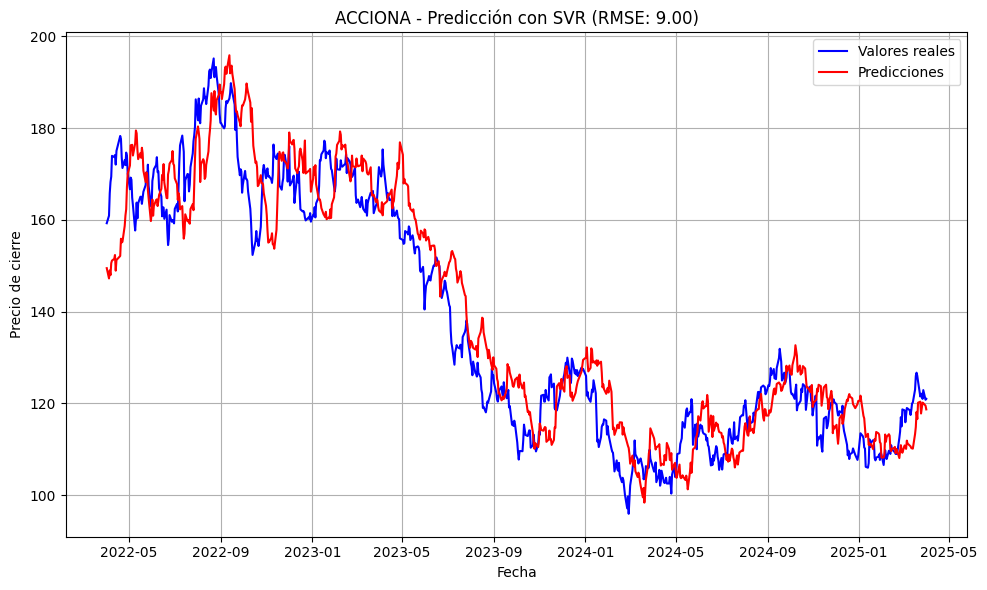


🔍 Procesando serie: INDITEX
⚙️ Ajustando modelo: SVR
📉 RMSE para INDITEX: 2.1777


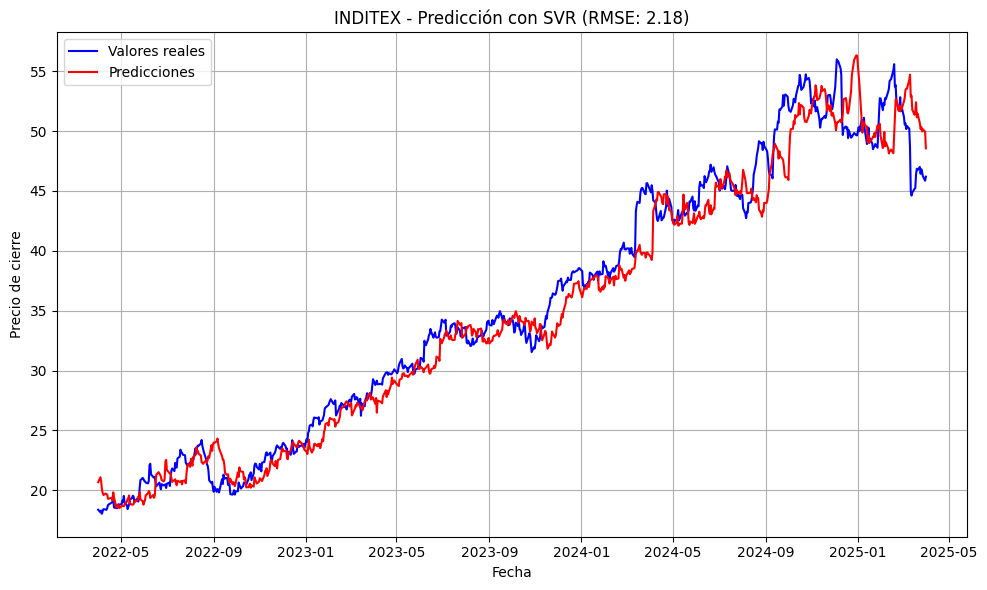


🔍 Procesando serie: AENA
⚙️ Ajustando modelo: SVR
📉 RMSE para AENA: 7.7937


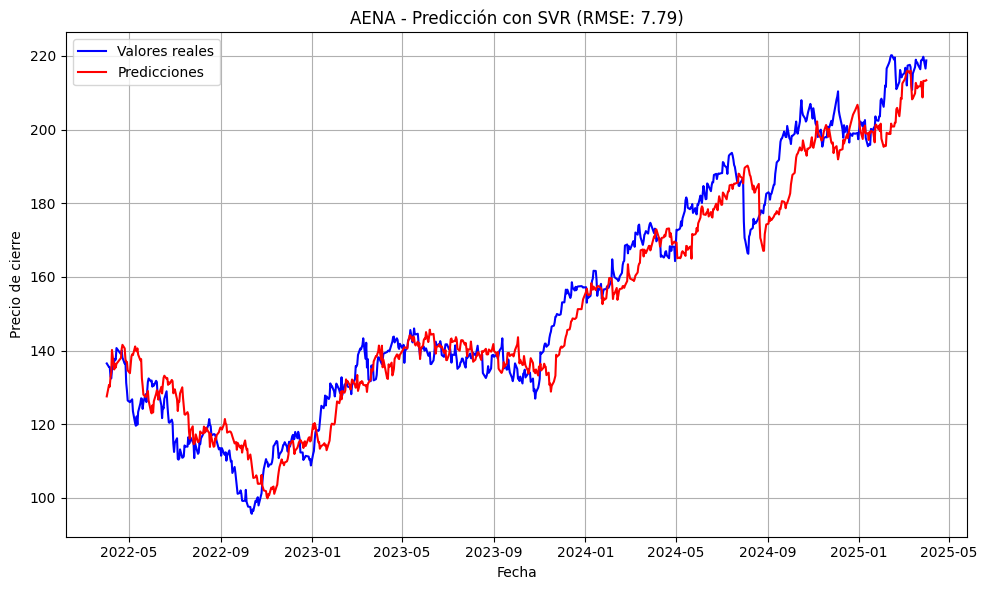


🔍 Procesando serie: ARCELORMITTAL
⚙️ Ajustando modelo: SVR
📉 RMSE para ARCELORMITTAL: 1.9000


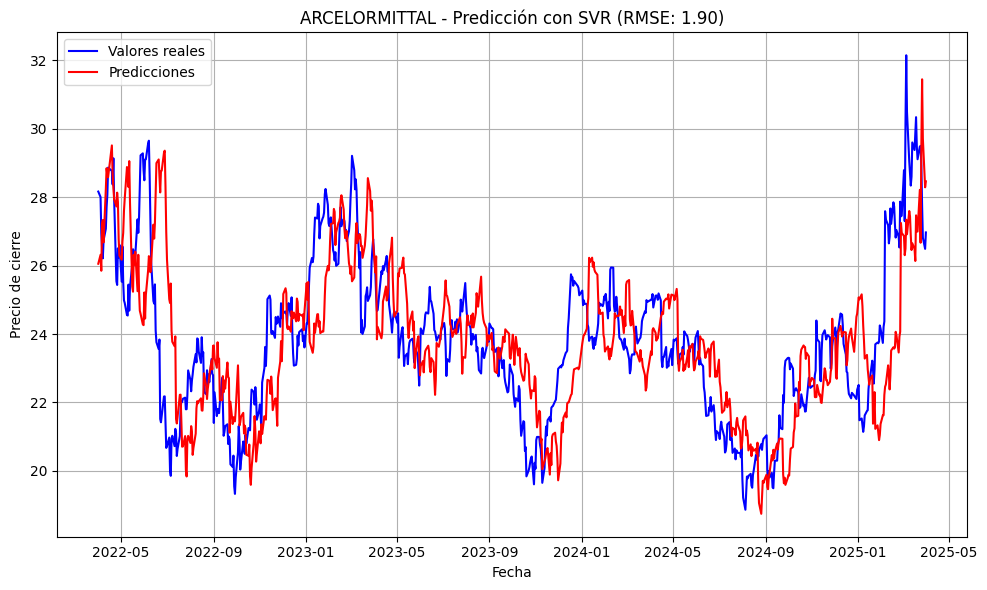


🔍 Procesando serie: BBVA
⚙️ Ajustando modelo: SVR
📉 RMSE para BBVA: 0.6322


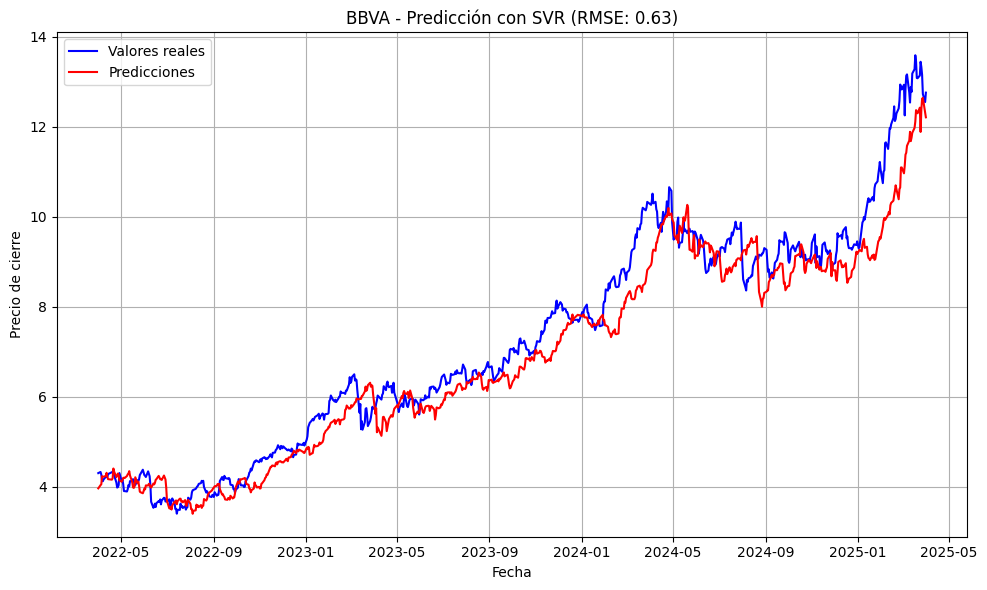


🔍 Procesando serie: INM. COLONIAL
⚙️ Ajustando modelo: SVR
📉 RMSE para INM. COLONIAL: 0.4544


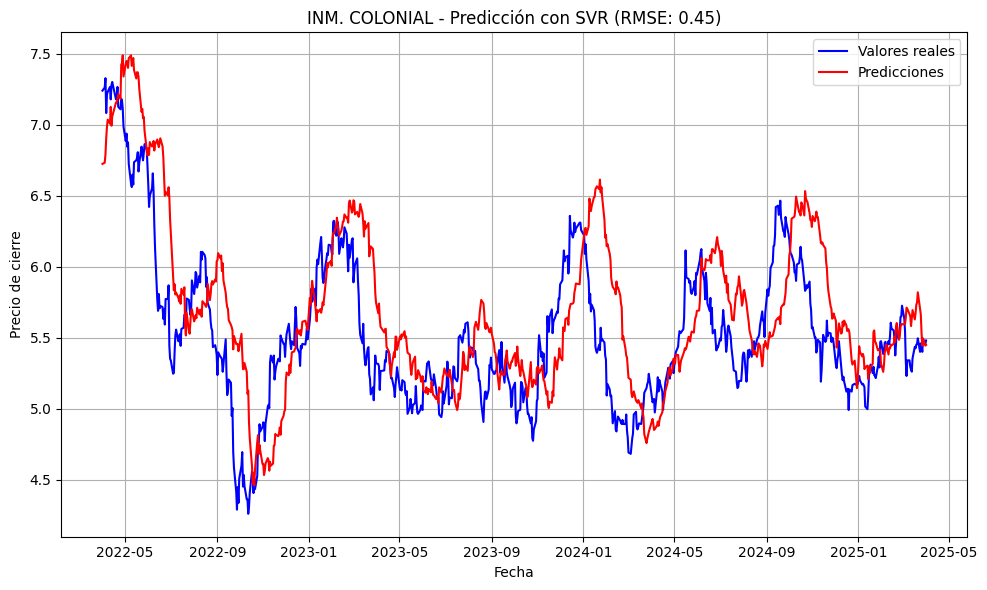


🔍 Procesando serie: SANTANDER
⚙️ Ajustando modelo: SVR
📉 RMSE para SANTANDER: 0.2956


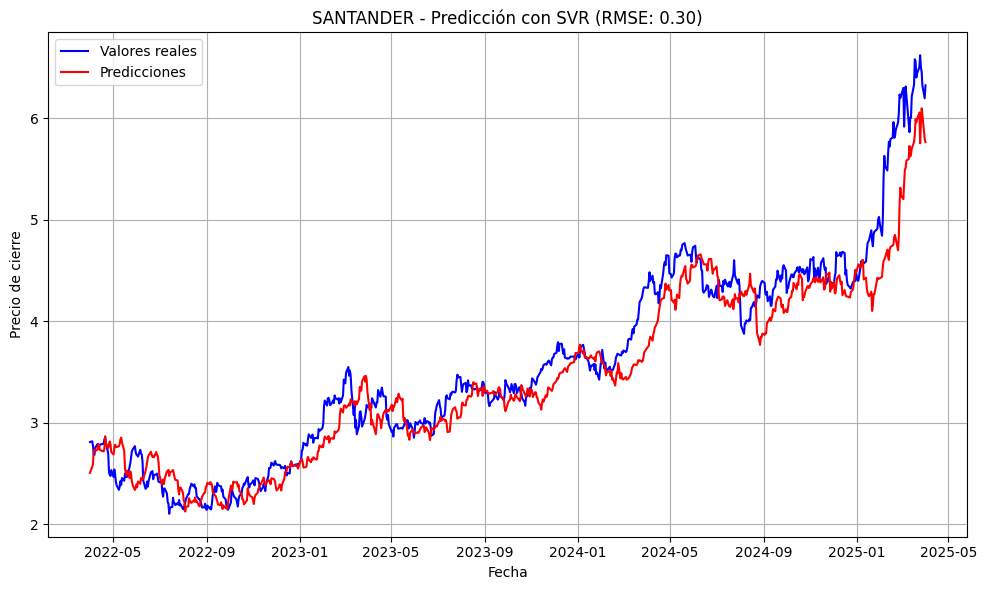

In [12]:
empresas = ['ACCIONA','INDITEX', 'AENA', 'ARCELORMITTAL', 'BBVA', 'INM. COLONIAL', 'SANTANDER'] # Define the empresas variable with company names
import matplotlib.pyplot as plt

# Recorrer cada DataFrame y graficar predicciones con el mejor modelo
for idx, (nombre, df) in enumerate(zip(empresas, empresas_prueba)):
    print(f"\n🔍 Procesando serie: {nombre}")

    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalado
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Volver a ajustar solo el mejor modelo con GridSearchCV
    print(f"⚙️ Ajustando modelo: {best_model_name}")
    grid = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grids[best_model_name],
        scoring='neg_root_mean_squared_error',
        cv=3,
        verbose=0,
        n_jobs=-1
    )
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_

    # Predecir
    y_pred = best_model.predict(X_test_scaled)

    # Calcular RMSE en test
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"📉 RMSE para {nombre}: {rmse:.4f}")

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Valores reales', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicciones', color='red')
    plt.title(f"{nombre} - Predicción con {best_model_name} (RMSE: {rmse:.2f})")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


MODELO DISTINTO PARA CADA UNA -> EL DE MENOR RMSE

In [13]:
# Diccionario para guardar los mejores modelos para cada serie
best_models_for_each_series = {}

# Recorrer cada DataFrame en la lista empresas_prueba
for idx, df in enumerate(empresas_prueba):
    # División en train y test
    train = df[df.index < fecha_test]
    test = df[df.index >= fecha_test]

    # Separar features (X) y target (y) en train
    X_train, y_train = train.drop(columns=['Precio_cierre']), train['Precio_cierre']

    # Separar features (X) y target (y) en test
    X_test, y_test = test.drop(columns=['Precio_cierre']), test['Precio_cierre']

    # Escalar los datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Evaluar los modelos para la serie
    print(f"\nEvaluando modelos para la serie {idx + 1}...")
    model_rmse = evaluate_models(
        X_train_scaled, y_train, X_test_scaled, y_test,
        models, param_grids
    )

    # Seleccionar el modelo con menor RMSE para esta serie
    best_model_name = min(model_rmse, key=model_rmse.get)
    best_rmse = model_rmse[best_model_name]
    print(f"✅ El mejor modelo para la serie {idx + 1} es: {best_model_name} con RMSE = {best_rmse:.4f}")

    # Guardar el mejor modelo para la serie
    best_models_for_each_series[idx] = {
        'model': best_model_name,
        'rmse': best_rmse
    }

# Calcular el RMSE medio de los mejores modelos para cada serie
all_rmses = [result['rmse'] for result in best_models_for_each_series.values()]
average_rmse = np.mean(all_rmses)
print(f"\nRMSE medio de los mejores modelos para cada serie: {average_rmse:.4f}")


Evaluando modelos para la serie 1...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 5.7263
RMSE en test para Linear Regression: 8.9856

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 13.1812
RMSE en test para Decision Tree: 20.9867

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 12.0873
RMSE en test para Random Forest: 21.4419

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 10.5415
RMSE en test para Gradient Boosting: 21.0132

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para XGBoost: 10.7630
RMSE en test para XGBoost: 20.8490

Entrenando SVR...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Mejor 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 14.2072
RMSE en test para MLP Regressor: 21.6460
✅ El mejor modelo para la serie 1 es: Linear Regression con RMSE = 8.9856

Evaluando modelos para la serie 2...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 1.1213
RMSE en test para Linear Regression: 2.2027

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 3.9887
RMSE en test para Decision Tree: 12.5278

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 3.4766
RMSE en test para Random Forest: 12.4715

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 3.0942
RMSE en test para Gradient Boosting: 13.3290

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mej

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 23.8991
RMSE en test para MLP Regressor: 22.1257
✅ El mejor modelo para la serie 3 es: SVR con RMSE = 7.7937

Evaluando modelos para la serie 4...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 4.0575
RMSE en test para Linear Regression: 2.1227

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 11.9021
RMSE en test para Decision Tree: 2.0743

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 11.6222
RMSE en test para Random Forest: 1.8735

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 11.6330
RMSE en test para Gradient Boosting: 2.2063

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) p

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejor RMSE (CV) para MLP Regressor: 153.8406
RMSE en test para MLP Regressor: 6.9133
✅ El mejor modelo para la serie 6 es: SVR con RMSE = 0.4544

Evaluando modelos para la serie 7...

Entrenando Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejor RMSE (CV) para Linear Regression: 0.2514
RMSE en test para Linear Regression: 0.3053

Entrenando Decision Tree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejor RMSE (CV) para Decision Tree: 0.3855
RMSE en test para Decision Tree: 0.5219

Entrenando Random Forest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Random Forest: 0.3340
RMSE en test para Random Forest: 0.5045

Entrenando Gradient Boosting...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para Gradient Boosting: 0.3192
RMSE en test para Gradient Boosting: 0.6735

Entrenando XGBoost...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejor RMSE (CV) para